In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_theme(style="white")    

daily_df=pd.read_csv("../data/wide_daily_scaledPer10k.csv")
daily_df.index=pd.to_datetime(daily_df['Date'])
daily_df.drop(columns=['Date'], inplace=True)


weekly_df=pd.read_csv("../data/wide_weekly_scaledPer10k.csv")
weekly_df=weekly_df.T
weekly_df.columns = weekly_df.iloc[0]
weekly_df = weekly_df.iloc[1:].reset_index(drop=True)


# Autocorrelations

## Grouped Autocorrelation plot: partial and 

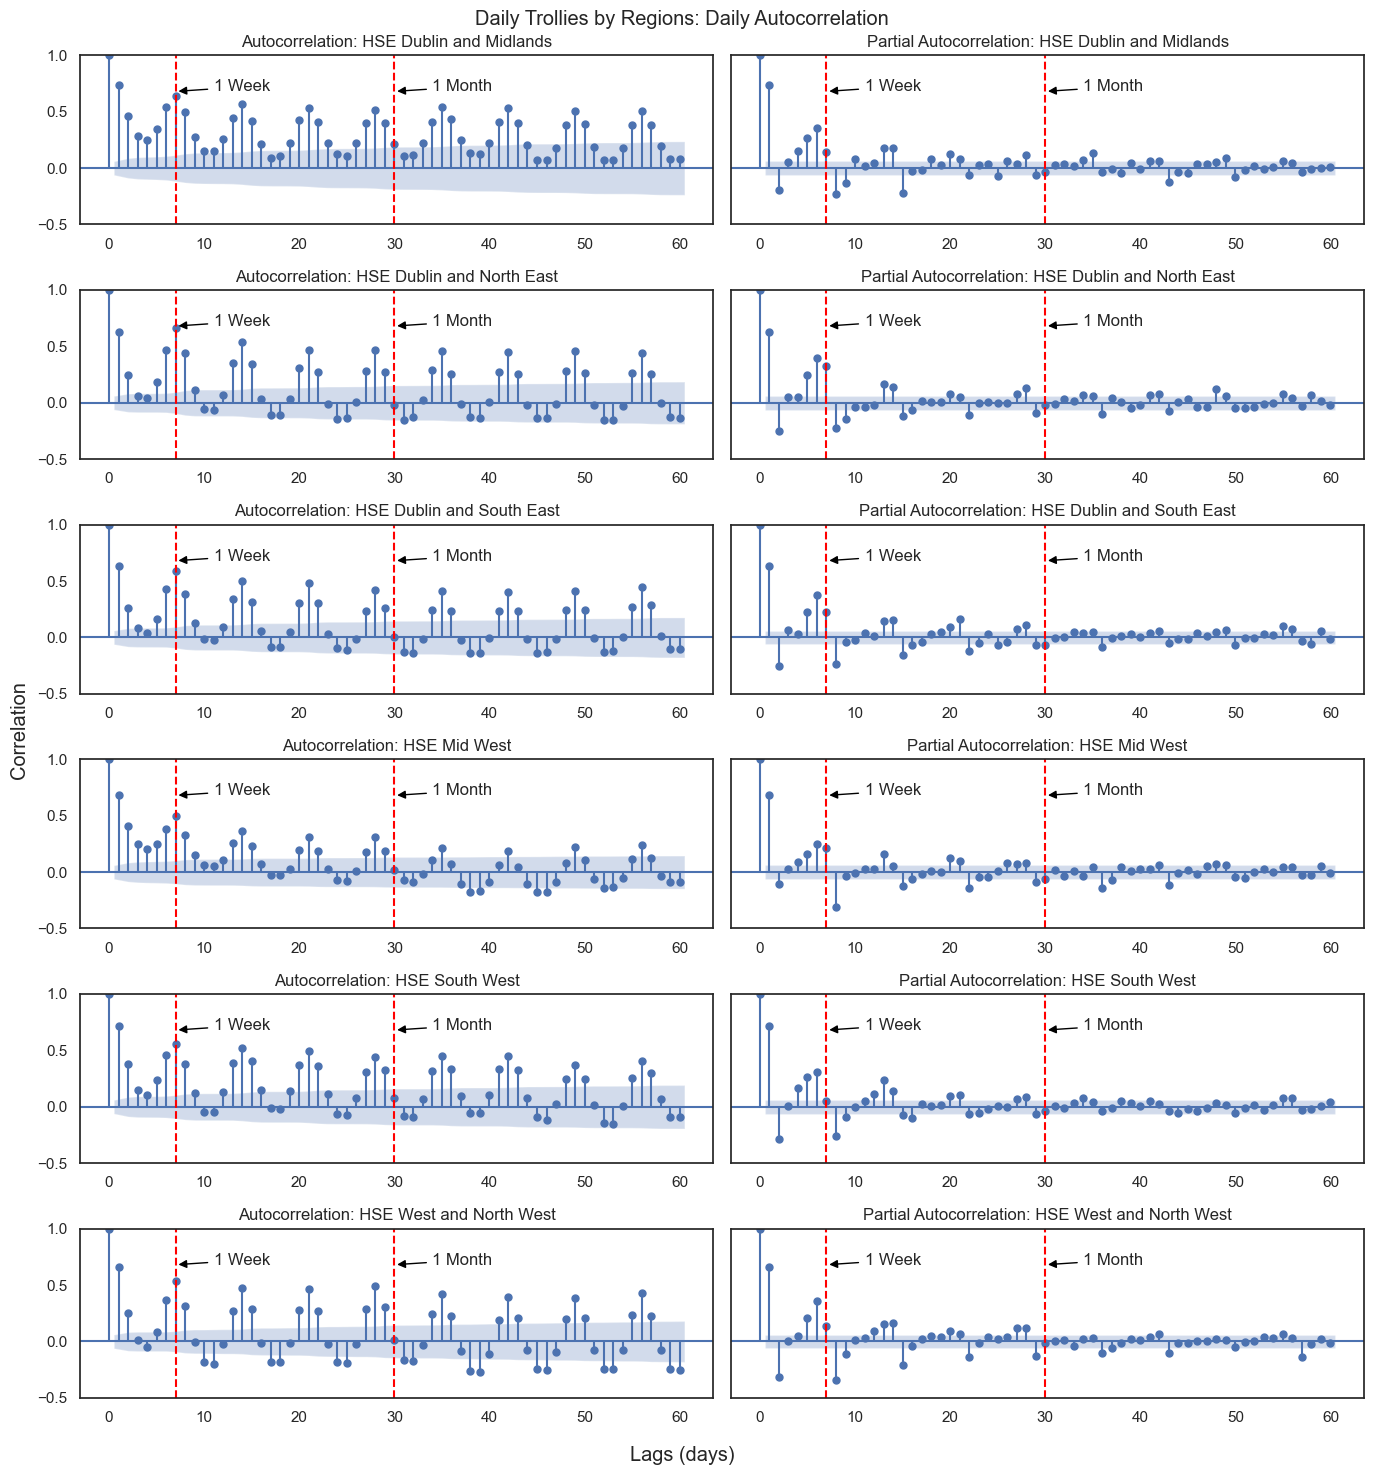

In [22]:
# settings
y_loc=.68; x_shift=4
n_lags=60

fig, axes = plt.subplots(daily_df.columns.__len__(), 2, figsize=(14, 15), sharey=True)
for i, (ax, col) in enumerate(zip(axes, daily_df.columns)):

    plot_acf(daily_df[col],  lags=n_lags, ax=ax[0], title=f'Autocorrelation: {col}')
    plot_pacf(daily_df[col], lags=n_lags, ax=ax[1], title=f'Partial Autocorrelation: {col}')

    # annotation lines
    ax[0].axvline(x=7, color='red', linestyle='--')  
    ax[0].axvline(x=30, color='red', linestyle='--') 
    ax[1].axvline(x=7, color='red', linestyle='--')  
    ax[1].axvline(x=30, color='red', linestyle='--') 
    # annotation text
    ax[0].annotate('1 Week',   xy=(7, plt.ylim()[1]*y_loc), xytext=(7  +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[0].annotate('1 Month',  xy=(30,plt.ylim()[1]*y_loc), xytext=(30 +x_shift, plt.ylim()[1]*y_loc),  arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Week',   xy=(7, plt.ylim()[1]*y_loc), xytext=(7  +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Month',  xy=(30,plt.ylim()[1]*y_loc), xytext=(30 +x_shift, plt.ylim()[1]*y_loc),  arrowprops=dict(arrowstyle='-|>', color='black'))

    ax[0].set_ylim(-.5,1)
    ax[1].set_ylim(-.5,1)

fig.suptitle('Daily Trollies by Regions: Daily Autocorrelation')
fig.supxlabel('Lags (days)')
fig.supylabel('Correlation')
plt.tight_layout()


## Autocorrelations (week sums)

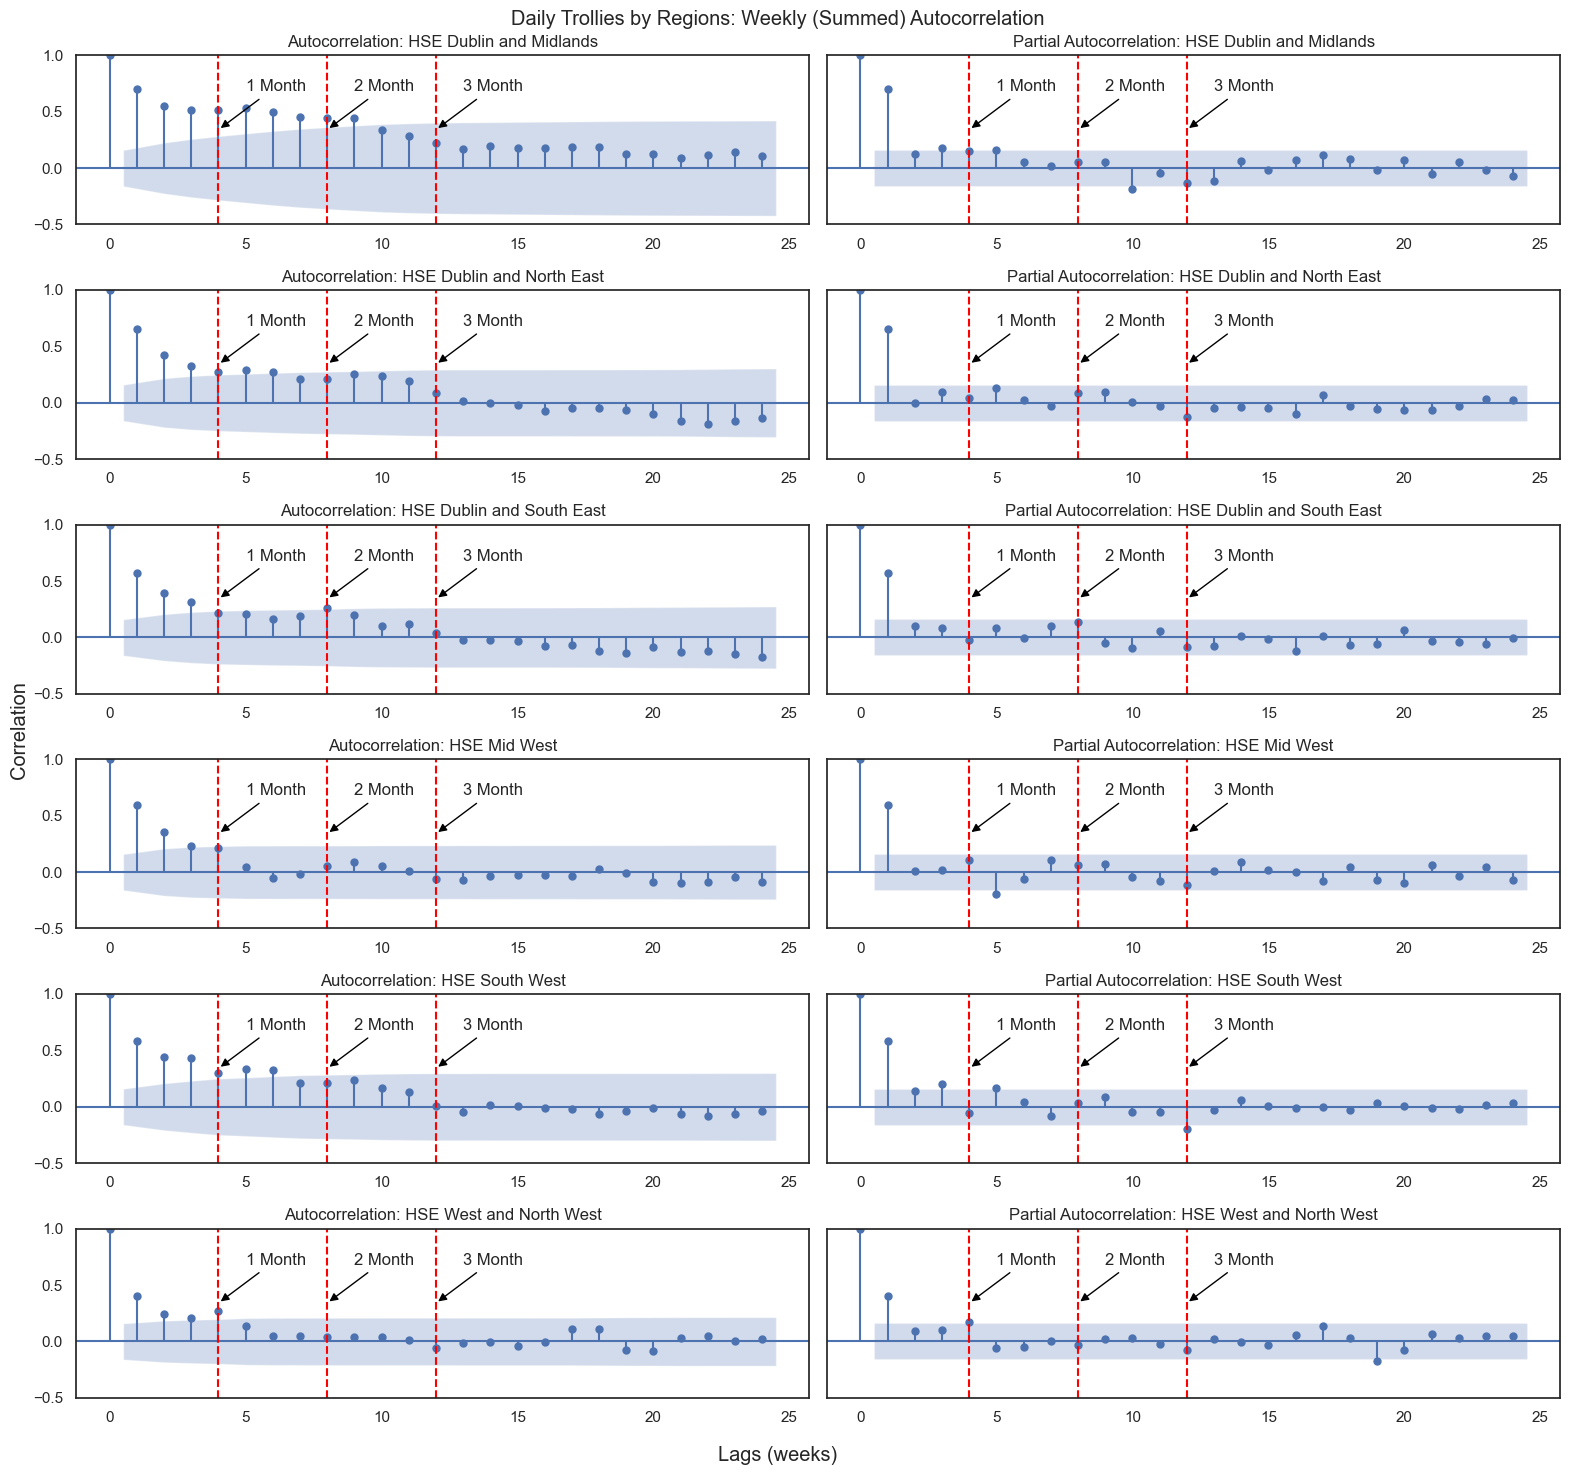

In [21]:
# settings
y_loc=.68; x_shift=1; n_lags=24

fig, axes = plt.subplots(weekly_df.columns.__len__(), 2, figsize=(16, 15), sharey=True)
for i, (ax, col) in enumerate(zip(axes, weekly_df.columns)):

    plot_acf(weekly_df[col],  lags=n_lags, ax=ax[0], title=f'Autocorrelation: {col}')
    plot_pacf(weekly_df[col], lags=n_lags, ax=ax[1], title=f'Partial Autocorrelation: {col}')

    # annotation lines
    ax[0].axvline(x=4, color='red', linestyle='--')  
    ax[1].axvline(x=4, color='red', linestyle='--')  
    ax[0].axvline(x=8, color='red', linestyle='--')
    ax[1].axvline(x=8, color='red', linestyle='--')  
    ax[0].axvline(x=12, color='red', linestyle='--')
    ax[1].axvline(x=12, color='red', linestyle='--')
    # annotation text
    ax[0].annotate('1 Month', xy=(4,  plt.ylim()[1]*y_loc*.5), xytext=(4 +x_shift,  plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('1 Month', xy=(4,  plt.ylim()[1]*y_loc*.5), xytext=(4 +x_shift,  plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[0].annotate('2 Month', xy=(8,  plt.ylim()[1]*y_loc*.5), xytext=(8 +x_shift,  plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('2 Month', xy=(8,  plt.ylim()[1]*y_loc*.5), xytext=(8 +x_shift,  plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[0].annotate('3 Month', xy=(12, plt.ylim()[1]*y_loc*.5), xytext=(12 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))
    ax[1].annotate('3 Month', xy=(12, plt.ylim()[1]*y_loc*.5), xytext=(12 +x_shift, plt.ylim()[1]*y_loc), arrowprops=dict(arrowstyle='-|>', color='black'))

    ax[0].set_ylim(-.5,1)
    ax[1].set_ylim(-.5,1)
    
fig.suptitle('Daily Trollies by Regions: Weekly (Summed) Autocorrelation')
fig.supxlabel('Lags (weeks)')
fig.supylabel('Correlation')
plt.tight_layout()
